This project aims to predict the duration of taxi trips in New York City using data from the 2016 Kaggle competition. We perform data exploration, feature engineering, model building, and evaluation.

In [39]:
import numpy as np 
import pandas as pd


## 1. Data Overview

Let's load the dataset and examine its basic structure, size, and features.

In [40]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


## 2. Exploratory Data Analysis (EDA) and Feature Engineering

In this section, we explore the dataset to identify patterns, detect outliers, and gain insights that may help improve the model's performance.We create new features from existing ones to enrich the dataset and provide more useful information for our model.

In [41]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [42]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [43]:
train.duplicated().sum()

0

In [44]:
test.duplicated().sum()

0

In [45]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [46]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [47]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'])
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Month'] = train['pickup_datetime'].dt.month

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Month'] = test['pickup_datetime'].dt.month

train['pickup_weekday'] = train['pickup_datetime'].dt.weekday 
train['is_weekend'] = train['pickup_weekday'].isin([5, 6]).astype(int)
train.drop('pickup_weekday',axis=1,inplace=True)

train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['is_rush_hour'] = train['pickup_hour'].isin([7, 8, 9,10,11,12,13,14,15, 16, 17, 18, 19,20,21,22]).astype(int)


test['pickup_weekday'] = test['pickup_datetime'].dt.weekday
test['is_weekend'] = test['pickup_weekday'].isin([5, 6]).astype(int)
test.drop('pickup_weekday',axis=1,inplace=True)

test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['is_rush_hour'] = test['pickup_hour'].isin([7, 8, 9,10,11,12,13,14,15, 16, 17, 18, 19,20,21,22]).astype(int)


In [48]:
!pip install haversine
from haversine import haversine

def compute_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup, dropoff)

train['distance_km'] = train.apply(compute_distance, axis=1)
test['distance_km']=test.apply(compute_distance,axis=1)

In [49]:
train.drop(columns=['pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude'],inplace=True)
test.drop(columns=['pickup_datetime'],inplace=True)
train.drop(columns=['pickup_datetime','dropoff_datetime'],inplace=True)
test.drop(columns=['pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude'],inplace=True)  

In [50]:
train['store_and_fwd_flag']=train['store_and_fwd_flag'].replace({'N':1,'Y':2})
test['store_and_fwd_flag']=test['store_and_fwd_flag'].replace({'N':1,'Y':2})

In [51]:
from itertools import combinations
train1=train.copy().drop(columns=['id','trip_duration'])
numeric_cols = train1.select_dtypes(include='number').columns

for col1, col2 in combinations(numeric_cols, 2):
    new_col_name = f'{col1}_x_{col2}'
    train[new_col_name] = train[col1] * train[col2]
    test[new_col_name]=test[col1]*test[col2]


## VISUAL PRESENTATION OF FEATURES

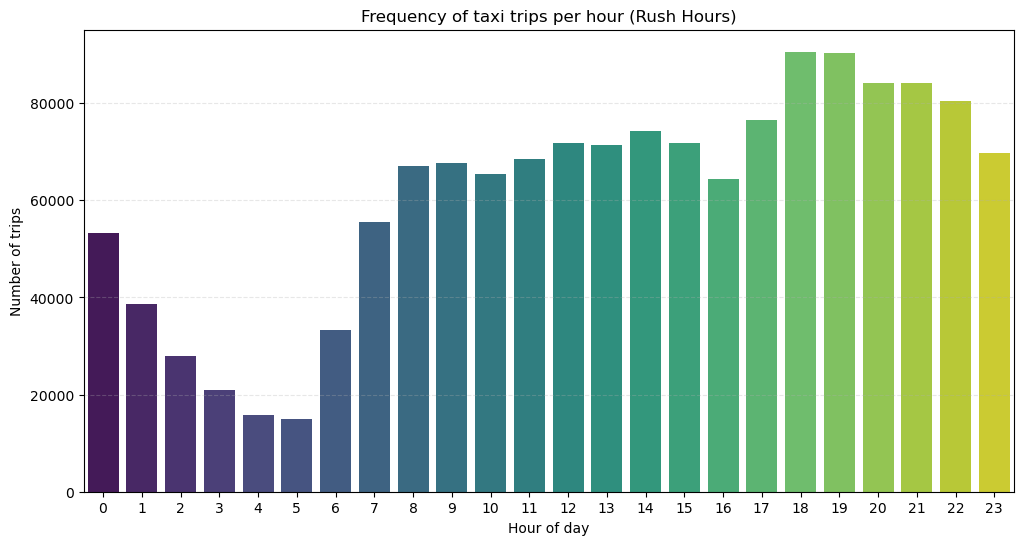

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=train, x='pickup_hour', palette='viridis')
plt.title('Frequency of taxi trips per hour (Rush Hours)')
plt.xlabel('Hour of day')
plt.ylabel('Number of trips')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

C:\Users\Fragkos-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


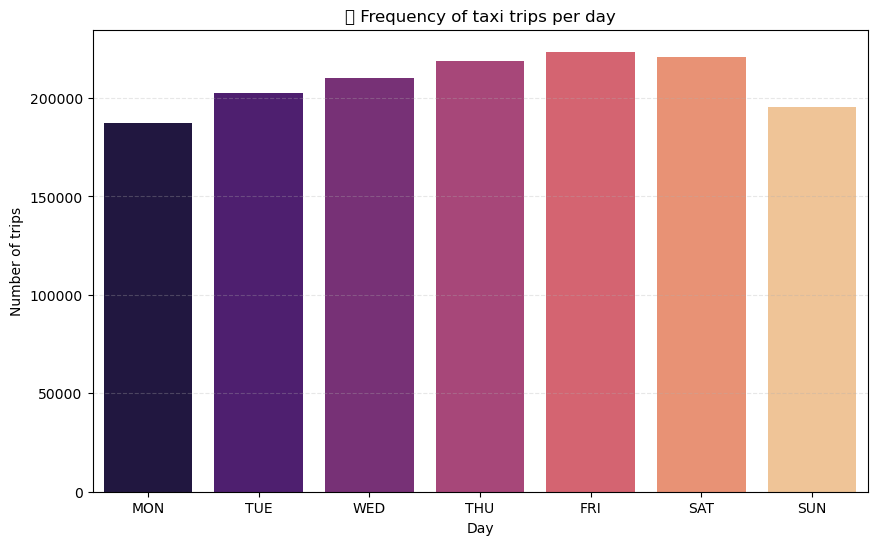

In [53]:
day_names = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
train['DayName'] = train['Day'].map(dict(enumerate(day_names)))
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='DayName', order=day_names, palette='magma')
plt.title('📅 Frequency of taxi trips per day')  
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

C:\Users\Fragkos-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


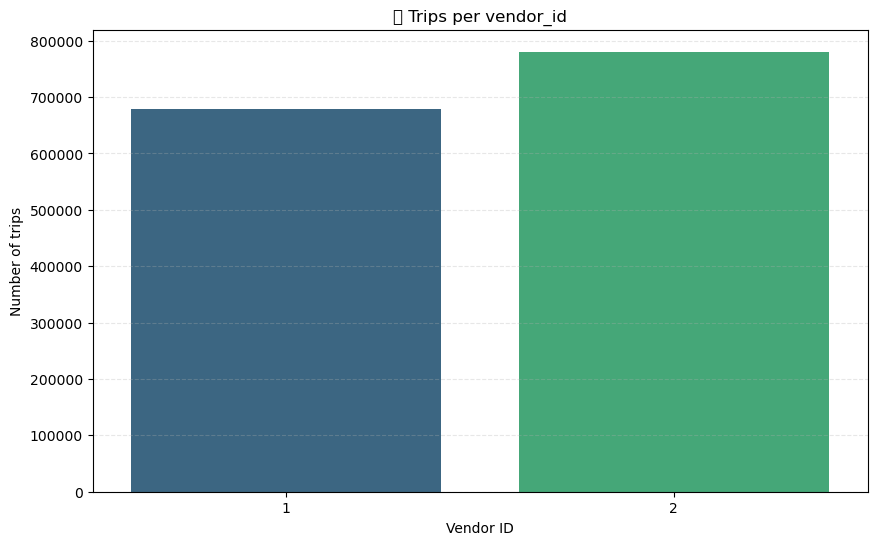

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='vendor_id', palette='viridis')
plt.title('📊 Trips per vendor_id')
plt.xlabel('Vendor ID')
plt.ylabel('Number of trips')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

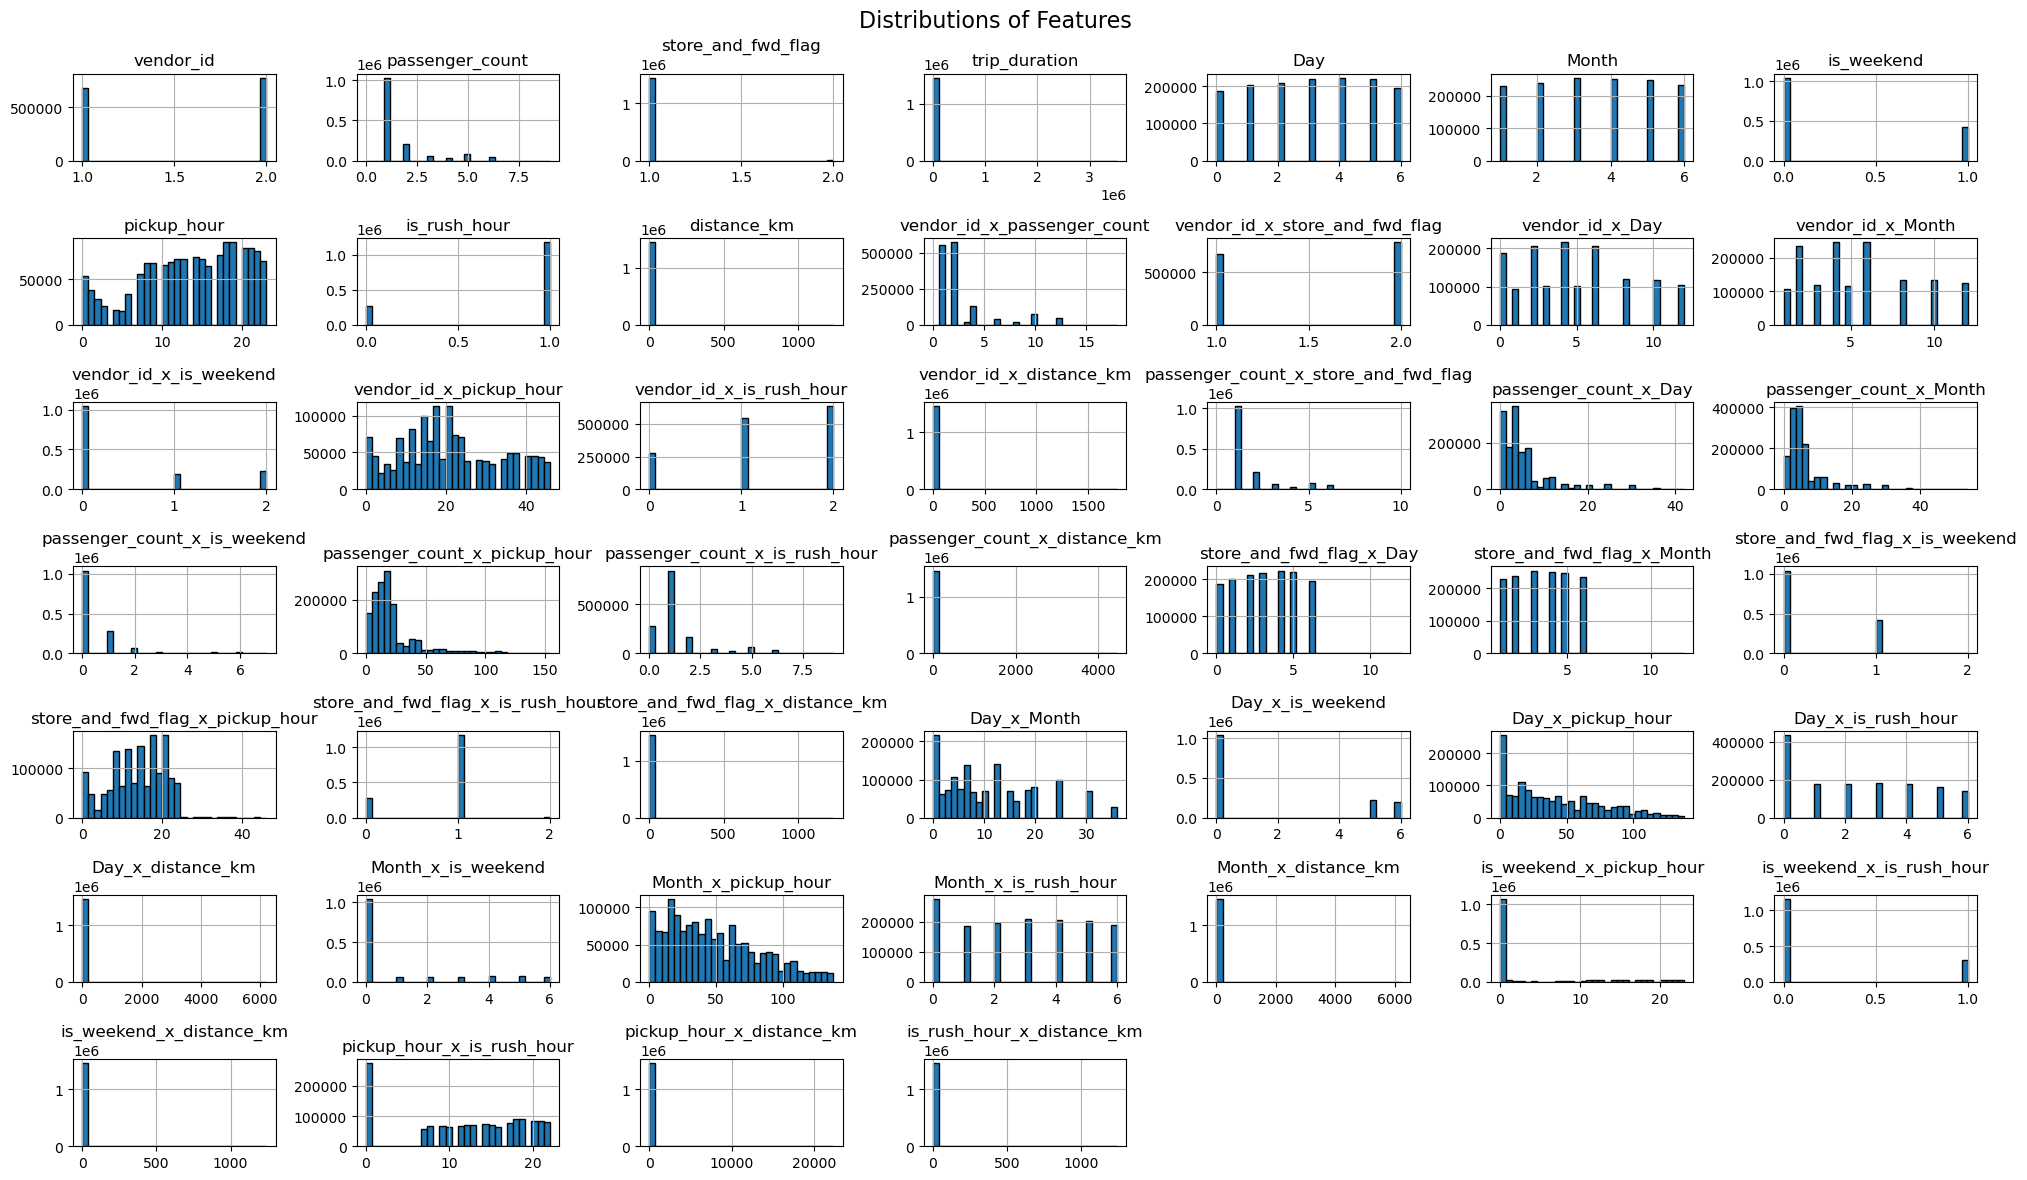

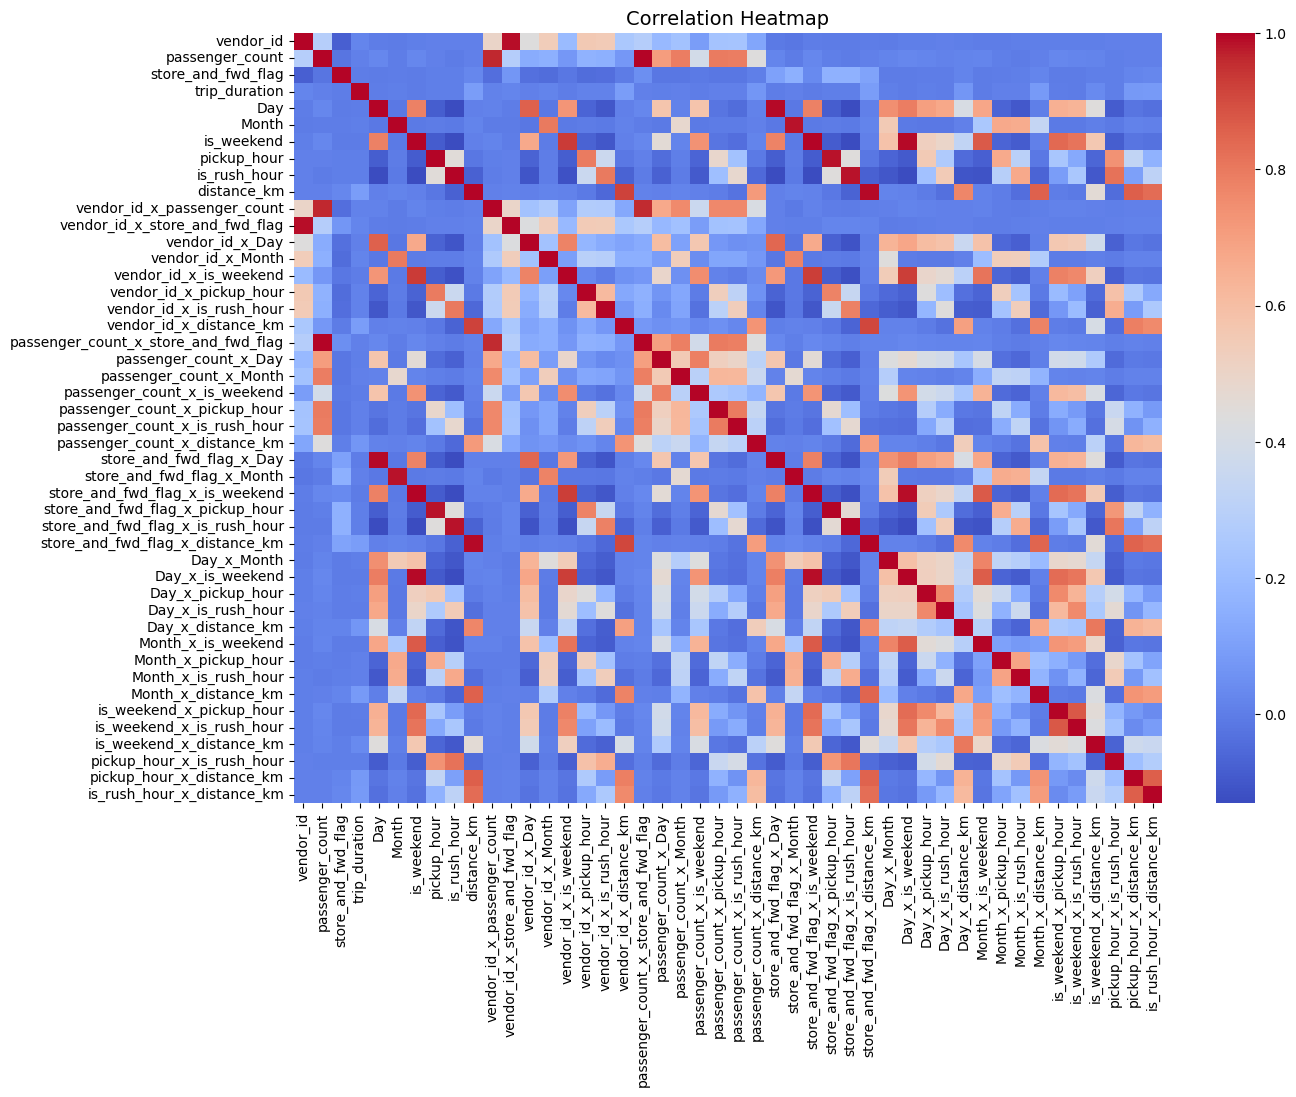


Correlation with target:
trip_duration                           1.000000
distance_km                             0.094777
vendor_id_x_distance_km                 0.094736
store_and_fwd_flag_x_distance_km        0.094082
is_rush_hour_x_distance_km              0.084760
Month_x_distance_km                     0.083739
pickup_hour_x_distance_km               0.080723
Day_x_distance_km                       0.071506
passenger_count_x_distance_km           0.068471
is_weekend_x_distance_km                0.036833
vendor_id_x_store_and_fwd_flag          0.020577
vendor_id                               0.020304
vendor_id_x_Month                       0.016998
vendor_id_x_is_rush_hour                0.015275
vendor_id_x_pickup_hour                 0.013784
vendor_id_x_passenger_count             0.011726
passenger_count_x_Month                 0.010782
passenger_count_x_is_rush_hour          0.009568
Month_x_is_rush_hour                    0.009488
vendor_id_x_Day                         0.0

In [55]:
train.drop('DayName',axis=1,inplace=True)
train2=train.copy().drop(columns=['id'],axis=1) 

train2.hist(bins=30, figsize=(20, 12), edgecolor='black') 
plt.suptitle("Distributions of Features", fontsize=16) 
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10)) 
sns.heatmap(train2.corr(), cmap='coolwarm', annot=False) 
plt.title("Correlation Heatmap", fontsize=14) 
plt.show()

target = 'trip_duration'
if target in train2.columns: corr_target = train2.corr()[target].sort_values(ascending=False) 
print("\nCorrelation with target:") 
print(corr_target)


## 4. Model Building

We train different machine learning models to predict trip duration. We also tune hyperparameters and evaluate model performance.

In [56]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
target_col='trip_duration'
masks = []
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    masks.append((train[col] >= lower) & (train[col] <= upper))

combined_mask = np.logical_and.reduce(masks)
train_clean = train[combined_mask].copy()
train_full = train.copy()

print(f"Χωρίς outliers: {train_clean.shape}, Με outliers: {train_full.shape}")


features = train_clean.columns.drop(['id', 'trip_duration'])

def prepare_data(df):
    X = df[features]
    y = df[target_col]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = prepare_data(train_clean)


scaler = StandardScaler()
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_test_clean_scaled = scaler.transform(X_test_clean)


models = {
    'Linear (clean)': LinearRegression().fit(X_train_clean_scaled, y_train_clean),
    'XGB (clean)': XGBRegressor(n_estimators=100, random_state=42).fit(X_train_clean, y_train_clean),
}

for name, model in models.items():
    if 'Linear' in name:
        X_test = X_test_clean_scaled 
        y_test = y_test_clean 
    else:
        X_test = X_test_clean 
        y_test = y_test_clean 

    preds = model.predict(X_test)
    print(f"\n🔹 {name}")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {mean_squared_error(y_test, preds, squared=False):.2f}")
    print(f"R²: {r2_score(y_test, preds):.4f}")
    

Χωρίς outliers: (544055, 47), Με outliers: (1458644, 47)

🔹 Linear (clean)
MAE: 213.14
RMSE: 284.30
R²: 0.4960

🔹 XGB (clean)
MAE: 198.37
RMSE: 266.64
R²: 0.5567


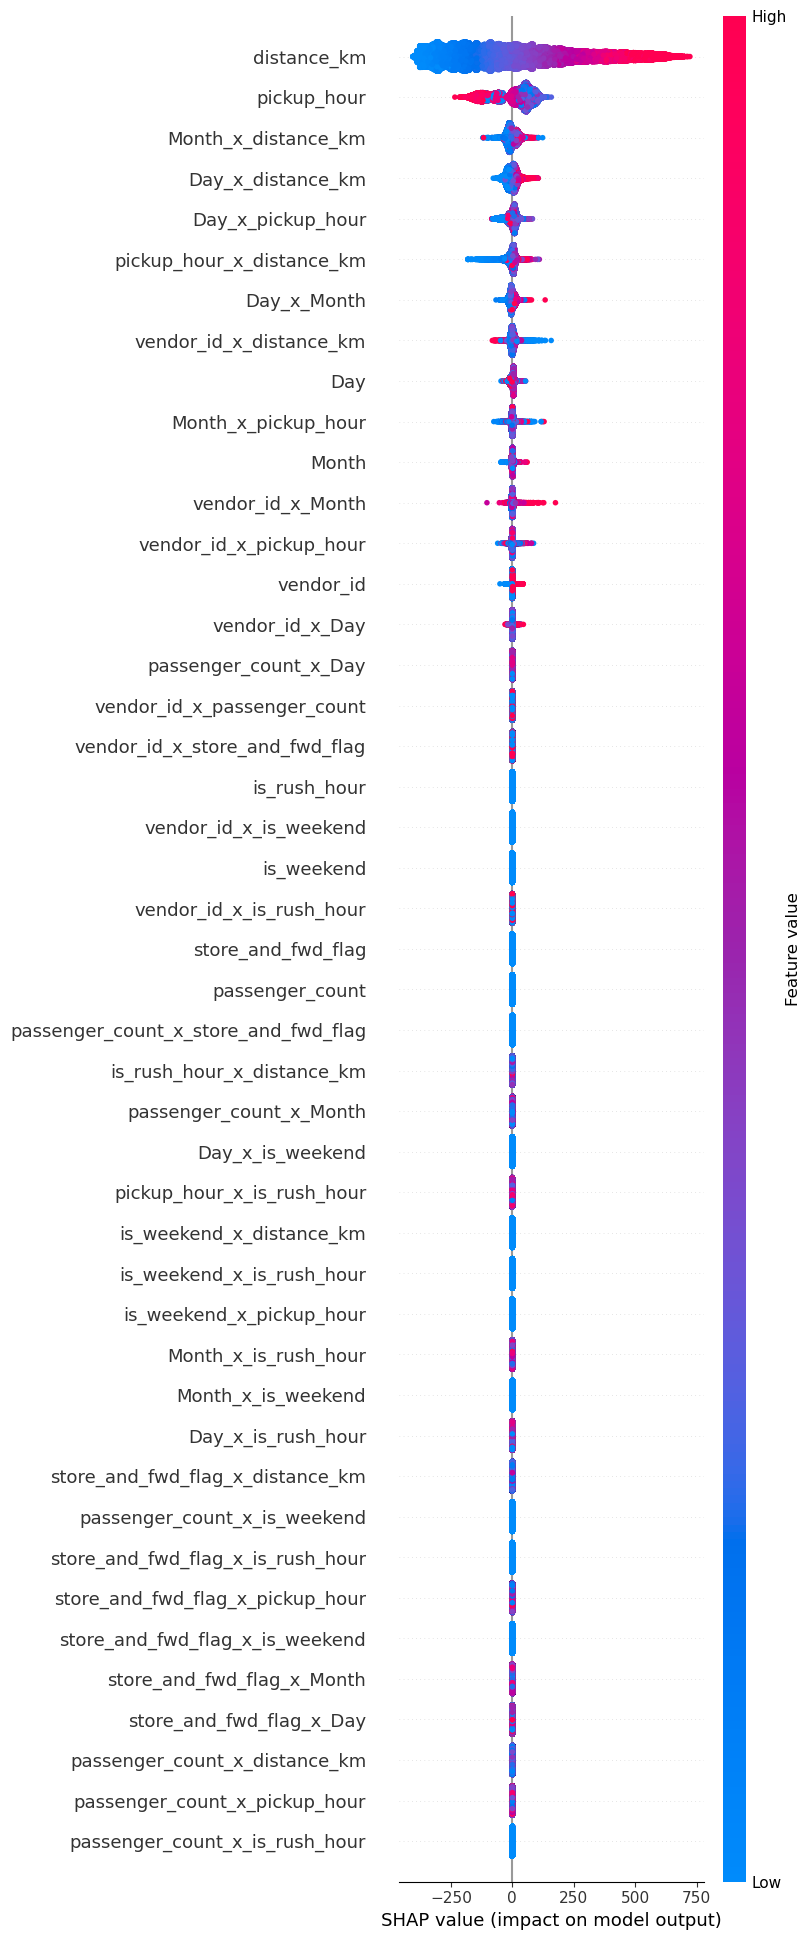

In [57]:
!pip install shap
import shap

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_clean, y_train_clean)


explainer = shap.Explainer(model)


X_sample = X_train_clean.sample(100000, random_state=42)
shap_values = explainer(X_sample)

shap.summary_plot(shap_values, X_sample, max_display=X_sample.shape[1])

## 5. Model Evaluation

We evaluate our models using appropriate metrics and analyze the results to select the best-performing model.

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train_clean, y_train_clean, scoring='neg_root_mean_squared_error', cv=5)
print(f"Cross-validated RMSE: {-np.mean(scores):.2f}")

Cross-validated RMSE: 268.23


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05],
}

grid_search = GridSearchCV(XGBRegressor(random_state=42),
                           param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_clean, y_train_clean)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best RMSE (log-scale): {-grid_search.best_score_:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best RMSE (log-scale): 267.35


In [60]:
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test_clean)

final_preds = preds
actuals = y_test_clean
print(f"Final MAE: {mean_absolute_error(actuals, final_preds):.2f}")
print(f"Final RMSE: {mean_squared_error(actuals, final_preds, squared=False):.2f}")
print(f"Final R²: {r2_score(actuals, final_preds):.4f}")


Final MAE: 197.97
Final RMSE: 265.92
Final R²: 0.5591


SELECTION OF THE FIRST 25 FEATURES WITH THE MOST IMPACT ON THE PREDICTIONS AS WE SEE FROM SHAP VALUES.

In [61]:
X_train_clean=X_train_clean.iloc[:,:25]
X_train_clean

,vendor_id,passenger_count,store_and_fwd_flag,Day,Month,is_weekend,pickup_hour,is_rush_hour,distance_km,vendor_id_x_passenger_count,...,vendor_id_x_is_rush_hour,vendor_id_x_distance_km,passenger_count_x_store_and_fwd_flag,passenger_count_x_Day,passenger_count_x_Month,passenger_count_x_is_weekend,passenger_count_x_pickup_hour,passenger_count_x_is_rush_hour,passenger_count_x_distance_km,store_and_fwd_flag_x_Day
514269,2,1,1,2,6,0,22,1,1.420473,2,...,2,2.840946,1,2,6,0,22,1,1.420473,2
331200,2,1,1,1,5,0,11,1,3.728595,2,...,2,7.457189,1,1,5,0,11,1,3.728595,1
867892,2,1,1,2,1,0,8,1,2.016098,2,...,2,4.032196,1,2,1,0,8,1,2.016098,2
1162033,1,1,1,2,3,0,7,1,2.309285,1,...,1,2.309285,1,2,3,0,7,1,2.309285,2
663749,2,1,1,3,3,0,18,1,1.267389,2,...,2,2.534777,1,3,3,0,18,1,1.267389,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296523,1,1,1,3,4,0,19,1,0.847410,1,...,1,0.847410,1,3,4,0,19,1,0.847410,3
695699,2,1,1,4,2,0,18,1,1.535664,2,...,2,3.071328,1,4,2,0,18,1,1.535664,4
982019,1,1,1,3,5,0,15,1,3.089987,1,...,1,3.089987,1,3,5,0,15,1,3.089987,3
354497,1,1,1,3,1,0,11,1,4.764400,1,...,1,4.764400,1,3,1,0,11,1,4.764400,3


In [62]:
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test_clean)

In [63]:
param_grid = {
'n_estimators': [50, 100],
'max_depth': [3, 5, 7],
'learning_rate': [0.1, 0.05],
}
grid_search = GridSearchCV(XGBRegressor(random_state=42),
 param_grid,
 scoring='neg_root_mean_squared_error',
 cv=3,
 verbose=1,
 n_jobs=-1)
grid_search.fit(X_train_clean, y_train_clean)
print(f"Best Params: {grid_search.best_params_}")
print(f"Best RMSE : {-grid_search.best_score_:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best RMSE : 267.28


In [64]:
X_test_clean=X_test_clean.iloc[:,:25]
best_model2 = grid_search.best_estimator_
new_preds = best_model2.predict(X_test_clean)

print(f'MAE IS:{mean_absolute_error(new_preds,y_test_clean)}')

MAE IS:197.9383425100604


In [65]:
ids=test['id']
test.drop(columns=['id'],axis=1,inplace=True)
test=test.iloc[:,:25]
sub_preds=best_model2.predict(test)
sub_preds

array([ 799.71136,  799.71136,  444.29047, ..., 1249.3158 , 1251.3306 ,
       1212.2109 ], dtype=float32)

In [66]:
submission=pd.DataFrame({'id':ids,'trip_duration':sub_preds})
submission.to_csv('submission.csv',index=False)